In [1]:
# 1. Librerías y configuración
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns

import torch
from torch import nn


In [2]:

# 2. Carga de datos
digits = load_digits()
X = digits.images.reshape(len(digits.images), -1)
y = digits.target



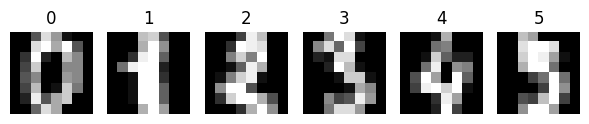

Shape de X: (1797, 64)
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64


In [3]:
# 3. Análisis exploratorio de datos
plt.figure(figsize=(6,2))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.axis('off')
    plt.title(y[i])
plt.tight_layout()
plt.show()

print("Shape de X:", X.shape)
print(pd.Series(y).value_counts())



In [4]:
# 4. Preprocesamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [5]:
# 5. Entrenamiento - Random Forest + búsqueda de hiperparámetros
rf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators':[75, 100], 'max_depth':[None, 10, 20]}
rf_cv = GridSearchCV(rf, rf_params, cv=3)
rf_cv.fit(X_train, y_train)
print("Mejor Random Forest:", rf_cv.best_params_)

y_pred_rf = rf_cv.predict(X_test)
print("Accuracy Random Forest:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



Mejor Random Forest: {'max_depth': None, 'n_estimators': 75}
Accuracy Random Forest: 0.9740740740740741
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.90      0.96      0.93        27
           2       1.00      1.00      1.00        27
           3       0.97      1.00      0.98        28
           4       0.96      1.00      0.98        27
           5       0.96      1.00      0.98        27
           6       1.00      1.00      1.00        27
           7       0.96      1.00      0.98        27
           8       1.00      0.85      0.92        26
           9       1.00      0.93      0.96        27

    accuracy                           0.97       270
   macro avg       0.98      0.97      0.97       270
weighted avg       0.98      0.97      0.97       270



In [6]:
# 6. Entrenamiento - SVM
svm = SVC(kernel='rbf', gamma='auto')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Accuracy SVM:", accuracy_score(y_test, y_pred_svm))



Accuracy SVM: 0.9666666666666667


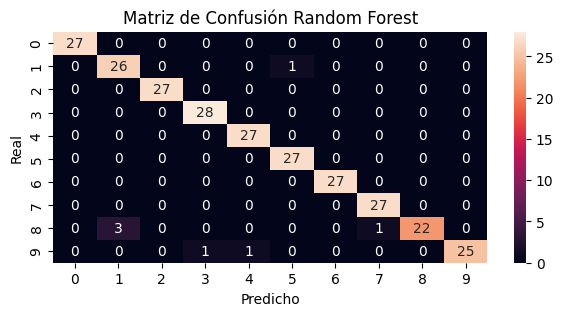

In [7]:
# 7. Métricas visuales
plt.figure(figsize=(7,3))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True)
plt.title('Matriz de Confusión Random Forest')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()



In [8]:
# 8. Red neuronal PyTorch
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        return self.fc2(x)

net = Net()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

for epoch in range(25):
    optimizer.zero_grad()
    output = net(X_train_tensor)
    loss = loss_fn(output, y_train_tensor)
    loss.backward()
    optimizer.step()

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_pred_net = net(X_test_tensor).detach().numpy()
y_pred_net = np.argmax(y_pred_net, axis=1)
print("Accuracy PyTorch MLP:", accuracy_score(y_test, y_pred_net))


Accuracy PyTorch MLP: 0.9481481481481482
